# PHASE 1 PROJECT
# SAFEST AIRCRAFT TO BUY BASED ON THE NATIONAL TRANSPORTATION SAFETY BOARD REPORT.(1962-2023)
## OBJECTIVES
1.	Identify aircraft models with the highest and lowest number of accidents overall.
2.	Analyze accident trends related to engine failure.
3.	Examine accidents caused by adverse weather conditions.
4.	Evaluate accidents based on the severity aircraft damage.
.
   
### SECTIONS.
1. Data Collection and Data understanding.
2. Data cleaning and filtering.
3. visualizations.
4. conclusion.

# SECTION ONE:
## *DATA COLLECTION AND DATA UNDERSTANDING.*
Getting data from our source Kaggle and maneuvering through it.


In [279]:
import kaggle

# Download and extract the dataset
kaggle.api.dataset_download_files('khsamaha/aviation-accident-database-synopses', 
                                  path='.', unzip=True)

print(" Dataset downloaded successfully!")

Dataset URL: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses
 Dataset downloaded successfully!


# LOADING DATA

In [281]:
import os
import pandas as pd  

# Load the dataset    # Update the file name if needed
aviation_data = pd.read_csv(r"C:\Users\Administrator\Documents\moringa school\PROJECT\AviationData.csv", encoding="latin-1")

# Display the first few rows  
print(aviation_data.head())  

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7628\1523196351.py:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv(r"C:\Users\Administrator\Documents\moringa school\PROJECT\AviationData.csv", encoding="latin-1")


# UNDERSTANDING DATA

In [282]:
# no of rows and columns
print(aviation_data.shape)

(88889, 31)


In [283]:
# data types and null values
print(aviation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# SECTION TWO:
## DATA CLEANING AND FILTRATION.

Since the company is only interested in aircrafts for commercial and private use, that should be our primary focus. Hence filtering data to commercial_private_flights.

In [290]:
# from our objectives we only need the below columns. 
aviation_data = aviation_data[['Model', 'Aircraft.damage', 'Weather.Condition', 'Broad.phase.of.flight', 'Event.Date', 'Purpose.of.flight']].dropna()
aviation_data

,Model,Aircraft.damage,Weather.Condition,Broad.phase.of.flight,Event.Date,Purpose.of.flight
0,108-3,Destroyed,UNK,Cruise,1948-10-24,Personal
1,PA24-180,Destroyed,UNK,Unknown,1962-07-19,Personal
2,172M,Destroyed,IMC,Cruise,1974-08-30,Personal
3,112,Destroyed,IMC,Cruise,1977-06-19,Personal
4,501,Destroyed,VMC,Approach,1979-08-02,Personal
...,...,...,...,...,...,...
63906,RAF 2000 GTX,Destroyed,VMC,Maneuvering,2007-12-29,Personal
63908,206L-3,Substantial,VMC,Maneuvering,2007-12-30,Other Work Use
63909,SR22,Substantial,VMC,Maneuvering,2007-12-30,Personal
63910,RV-8,Substantial,VMC,Takeoff,2007-12-30,Personal


In [288]:
# filtering data to focus on commecial_private_flights.
commercial_private_flights = [
    "Personal", "Business", "Executive/corporate", "Instructional"
]

# Filter the dataset
filtered_data = aviation_data[aviation_data["Purpose.of.flight"].isin(commercial_private_flights)]

# Show the first few rows
print(filtered_data.head())


         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

Further, since our dataset dates back to 1962, many aircraft models have become outdated due to technological advancements. To ensure a more relevant and insightful analysis, I focused on flight accidents from 2000 to 2023—a period marked by significant improvements in aircraft efficiency, safety, and the integration of AI and automation.


In [307]:
# Convert 'Event.Date' to datetime format
filtered_data['Event.Date'] = pd.to_datetime(filtered_data['Event.Date'], errors='coerce')

# Filter for accidents from the year 2000 onwards
modern_aircraft_data = filtered_data[filtered_data['Event.Date'].dt.year >= 2000]

# Display first few rows
print(modern_aircraft_data.head())

             Event.Id Investigation.Type Accident.Number Event.Date  \
47676  20001212X20327           Accident      ATL00FA019 2000-01-01   
47677  20001212X20383           Accident      LAX00LA063 2000-01-02   
47678  20001212X20382           Accident      LAX00LA062 2000-01-02   
47679  20001212X20364           Accident      FTW00LA067 2000-01-02   
47680  20001212X20358           Accident      FTW00LA057 2000-01-02   

              Location        Country Latitude Longitude Airport.Code  \
47676    MONTEAGLE, TN  United States      NaN       NaN          NaN   
47677  VICTORVILLE, CA  United States      NaN       NaN          NaN   
47678    DOS PALOS, CA  United States      NaN       NaN          NaN   
47679      CORNING, AR  United States      NaN       NaN          NaN   
47680       ODESSA, TX  United States      NaN       NaN          NaN   

      Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
47676          NaN  ...          Personal         NaN   

Handling missing values


# Analysing the safest aircraft to buy

Based on the model which has the least number of accidents but it is not a rare aircraft.(has more than five occurence)

In [370]:
# Counting frequency
model_counts = modern_aircraft_data['Model'].value_counts()

# Select models with at least 5 occurrences
common_models = model_counts[model_counts >= 5]

# Filter the dataset to only include these common models
filtered_common_data = modern_aircraft_data[modern_aircraft_data['Model'].isin(common_models.index)]

# Display the top 10 safest common models (least accidents)
safest_common_models = filtered_common_data['Model'].value_counts().nsmallest(10)

print("Safest Common Aircraft Models (with at least 5 occurrences):")
print(safest_common_models)


Safest Common Aircraft Models (with at least 5 occurrences):
Model
AEROSTAR601    5
PA 11          5
PA44           5
CYGNET         5
SGS233         5
PA46 500TP     5
L-19E          5
DA 40 NG       5
STOL CH 750    5
AA 5B          5
Name: count, dtype: int64


## MODELS WITH MOST ACCIDENTS

In [342]:
# Counting frequency
model_counts = modern_aircraft_data['Model'].value_counts()

# Select models with at least 5 occurrences
common_models = model_counts[model_counts >= 5]

# Filter the dataset to only include these common models
filtered_common_data = modern_aircraft_data[modern_aircraft_data['Model'].isin(common_models.index)]

# Display the top 10 safest common models (least accidents)
worst_common_models = filtered_common_data['Model'].value_counts().nlargest(10)

print("worst Common Aircraft Models (with at least 5 occurrences):")
print(worst_common_models)

worst Common Aircraft Models (with at least 5 occurrences):
Model
172          762
152          496
172N         387
172S         355
PA-28-140    277
172M         274
180          265
A36          251
SR22         247
182          243
Name: count, dtype: int64


# Analysing accident causes.
From our objectives:
1. Bad weather
2. Bad engine
3. Severe damage

# Bad Weather.

## SAFEST AIRCRAFT MODELS BASED ON BAD WEATHER

In [323]:
# Filter accidents that occurred in IMC (bad weather) within modern aircraft data
bad_weather_accidents = modern_aircraft_data[modern_aircraft_data['Weather.Condition'] == 'IMC']

# Count the frequency (occurrence)
bad_weather_counts = bad_weather_accidents['Model'].value_counts()

# Display the 10 aircraft models with the fewest bad weather accidents
print("Safest Aircraft Models Based on Bad Weather:")
print(bad_weather_counts.nsmallest(10))


Safest Aircraft Models Based on Bad Weather:
Model
B24R         1
ESCAPADE     1
M-5-210C     1
MANTA 503    1
PA-42        1
TB20         1
VANS RV7A    1
NAVION A     1
407          1
REMOS GX     1
Name: count, dtype: int64


## WORST AIRCRAFTS DUE TO BAD WEATHER.

In [343]:
# Filter accidents that occurred in IMC (bad weather) within modern aircraft data
bad_weather_accidents = modern_aircraft_data[modern_aircraft_data['Weather.Condition'] == 'IMC']

# Count the frequency (occurrence)
bad_weather_counts = bad_weather_accidents['Model'].value_counts()

# Display the 10 aircraft models with the fewest bad weather accidents
print("worst Aircraft Models Based on Bad Weather:")
print(bad_weather_counts.nlargest(10))

worst Aircraft Models Based on Bad Weather:
Model
A36           43
SR22          40
172           18
PA-32-300     17
PA-28-140     16
182           16
PA-34-200T    15
58            15
172N          14
PA-28-180     14
Name: count, dtype: int64


# Engine Failure.

## SAFEST AIRCRAFTS MODELS BASED ON ENGINE FAILURE

In [310]:
# Filter for engine failure incidents in relevant flight phases (Takeoff, Climb, Landing) in modern aircraft
engine_failure_data = modern_aircraft_data[
    modern_aircraft_data['Broad.phase.of.flight'].isin(["Takeoff", "Climb", "Landing"])
]

# Count frequency of accidents per model
engine_failure_counts = engine_failure_data['Model'].value_counts()

# Identify safest aircraft (those with the least failures, but more than 1 for comparison)
safest_engine_models = engine_failure_counts[engine_failure_counts > 1].nsmallest(10)

# Display results
print("Safest Aircraft Models Based on Engine Failures:\n", safest_engine_models)


Safest Aircraft Models Based on Engine Failures:
 Model
Pitts S2B            2
BE-300               2
J35                  2
PA-31T               2
XL2                  2
Christen Eagle II    2
206-L4               2
A2                   2
DA 20-C1             2
SGS 1-26B            2
Name: count, dtype: int64


## WORST AIRCRAFTS MODEL DUE TO ENGINE FAILURE

In [344]:
# Filter for engine failure incidents in relevant flight phases (Takeoff, Climb, Landing) in modern aircraft
engine_failure_data = modern_aircraft_data[
    modern_aircraft_data['Broad.phase.of.flight'].isin(["Takeoff", "Climb", "Landing"])
]

# Count frequency of accidents per model
engine_failure_counts = engine_failure_data['Model'].value_counts()

# Identify safest aircraft (those with the least failures, but more than 1 for comparison)
safest_engine_models = engine_failure_counts[engine_failure_counts > 1].nlargest(10)

# Display results
print("Worst Aircraft Models Based on Engine Failures:\n", safest_engine_models)

Worst Aircraft Models Based on Engine Failures:
 Model
152          159
172N         127
172S         124
172           83
172M          83
172P          83
PA-28-140     76
PA-18         74
180           72
PA-18-150     59
Name: count, dtype: int64


# Severe Damage.

## AIRCRAFTS WITH LOW COUNTS ON SEVERE DAMAGE

In [331]:
# Filter accidents with severe damage (Destroyed or Substantial) within modern commercial & private flights
severe_damage_accidents = modern_aircraft_data[
    modern_aircraft_data['Aircraft.damage'].isin(['Destroyed', 'Substantial'])
]

# Count accidents per aircraft model
severe_damage_counts = severe_damage_accidents['Model'].value_counts()

# Display the 10 aircraft models with the fewest severe damage accidents
print("Safest Aircraft Models Based on Severe Damage:")
print(severe_damage_counts.nsmallest(10))

Safest Aircraft Models Based on Severe Damage:
Model
Star-Lite               1
Tailwheel               1
Aerostar 600            1
5J                      1
JUSTAIRCRAFT SUPERST    1
SUPER CHIEF             1
KOLB MARK 3X            1
EA 500                  1
PITTS 12-EH             1
Zodiac CH-650           1
Name: count, dtype: int64


# AIRCRAFTS WITH THE MOST SEVERE DAMAGES

In [345]:
# Filter accidents with severe damage (Destroyed or Substantial) within modern commercial & private flights
severe_damage_accidents = modern_aircraft_data[
    modern_aircraft_data['Aircraft.damage'].isin(['Destroyed', 'Substantial'])
]

# Count accidents per aircraft model
severe_damage_counts = severe_damage_accidents['Model'].value_counts()

# Display the 10 aircraft models with the fewest severe damage accidents
print("Worst Aircraft Models Based on Severe Damage:")
print(severe_damage_counts.nlargest(10))

Worst Aircraft Models Based on Severe Damage:
Model
172          750
152          487
172N         383
172S         343
PA-28-140    273
172M         265
180          263
A36          245
182          240
SR22         235
Name: count, dtype: int64


# SECTION THREE:
## VISUALIZATION.

## Top 10 Safest Common Aircraft Models (at least 5 occurrences)

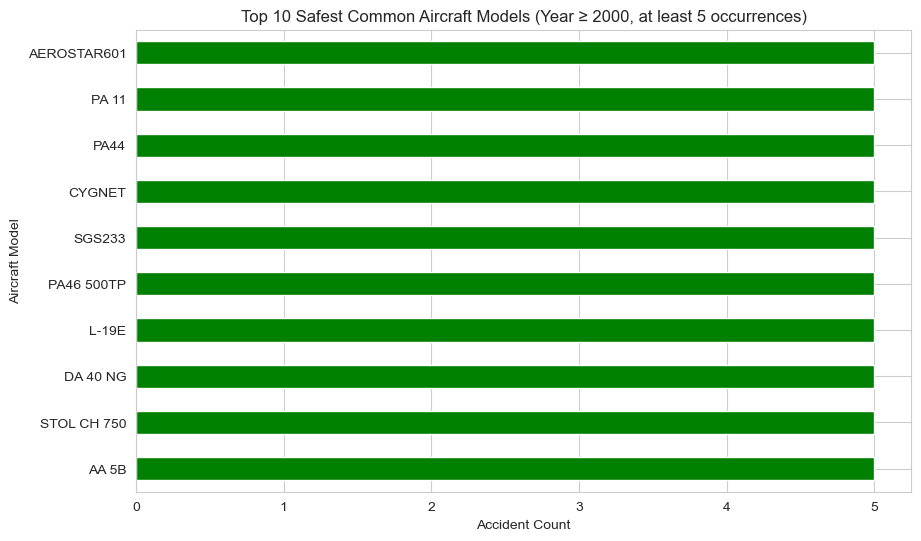

In [371]:
import matplotlib.pyplot as plt

# Visualization should use the same safest_common_models object
plt.figure(figsize=(10, 6))
safest_common_models.plot(kind='barh', color='green')
plt.xlabel('Accident Count')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Safest Common Aircraft Models (Year ≥ 2000, at least 5 occurrences)')
plt.gca().invert_yaxis()
plt.show()


## Top 10 Safest Aircraft Models Based on Bad Weather

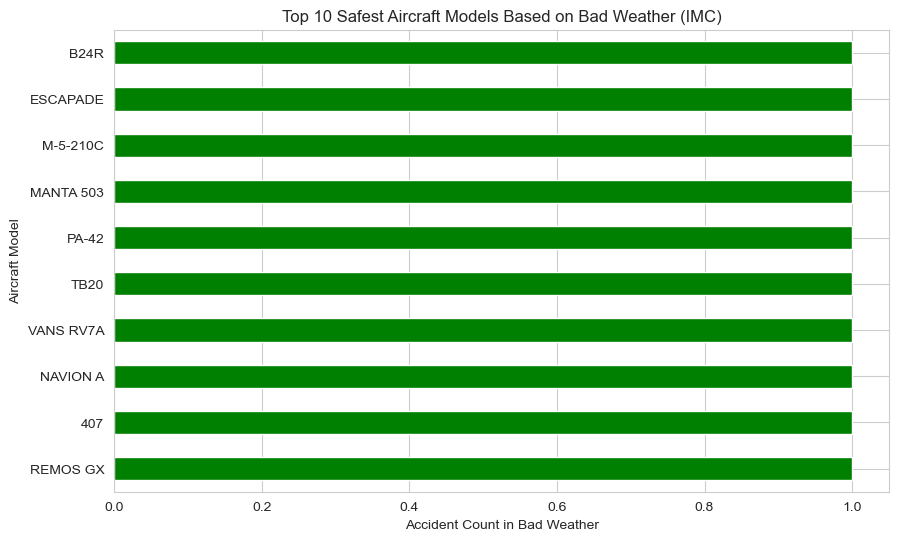

In [375]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
safest_bad_weather_models.plot(kind='barh', color='green')
plt.xlabel('Accident Count in Bad Weather')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Safest Aircraft Models Based on Bad Weather (IMC)')
plt.gca().invert_yaxis()  # Ensure the lowest accident count is at the top
plt.show()


## Top 10 Safest Aircraft Models Based on Engine Failures

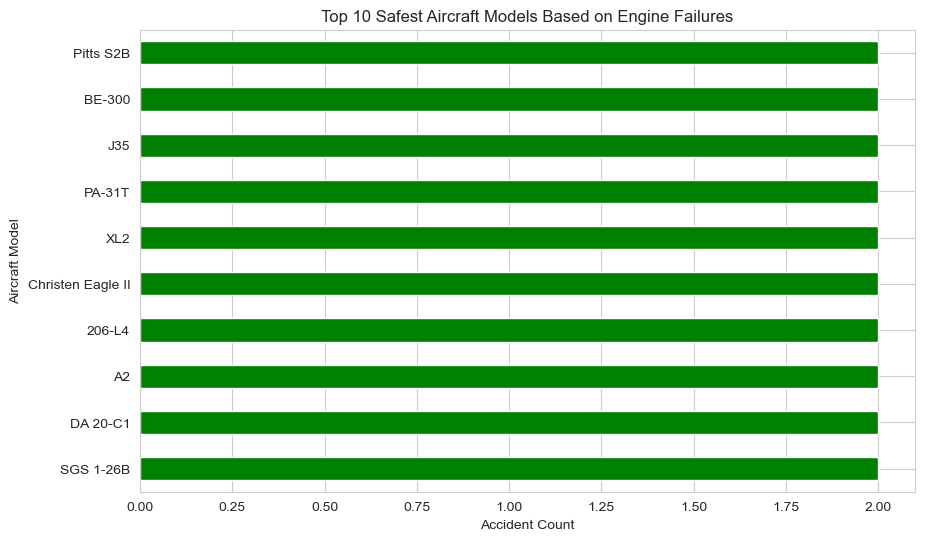

In [376]:
# Filter for engine failure incidents (Takeoff, Climb, Landing)
engine_failure_data = modern_aircraft_data[
    modern_aircraft_data['Broad.phase.of.flight'].isin(["Takeoff", "Climb", "Landing"])
]

# Count accidents per model
engine_failure_counts = engine_failure_data['Model'].value_counts()

# Identify the 10 safest models (least failures, more than 1 for comparison)
safest_engine_models = engine_failure_counts[engine_failure_counts > 1].nsmallest(10)

# Bar chart
plt.figure(figsize=(10, 6))
safest_engine_models.plot(kind='barh', color='green')
plt.xlabel('Accident Count')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Safest Aircraft Models Based on Engine Failures')
plt.gca().invert_yaxis()
plt.show()


## Top 10 Safest Aircraft Models Based on Severe Damage

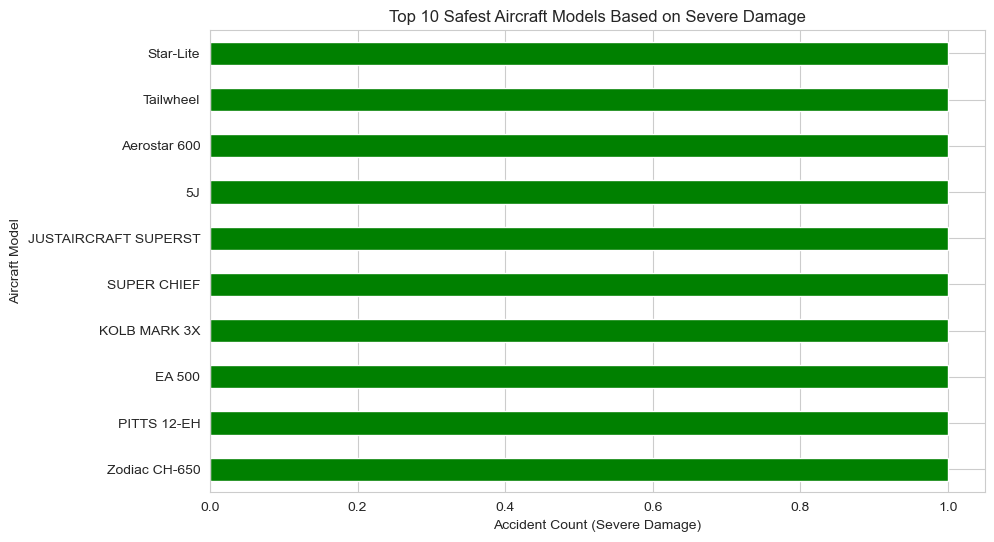

In [374]:
import matplotlib.pyplot as plt
# Filter accidents with severe damage (Destroyed or Substantial) in modern aircraft
severe_damage_accidents = modern_aircraft_data[
    modern_aircraft_data['Aircraft.damage'].isin(['Destroyed', 'Substantial'])
]

# Count accidents per aircraft model
severe_damage_counts = severe_damage_accidents['Model'].value_counts()

# Select the 10 safest models (least accidents)
safest_severe_damage_models = severe_damage_counts.nsmallest(10)

# Create a bar chart for the safest models in severe damage incidents
plt.figure(figsize=(10, 6))
safest_severe_damage_models.plot(kind='barh', color='green')
plt.xlabel('Accident Count (Severe Damage)')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Safest Aircraft Models Based on Severe Damage')
plt.gca().invert_yaxis()  # Ensures the safest models appear at the top
plt.show()



## WORST AIRCRAFTS (TO BE AVOIDED).
### AIRCRAFTS WITH MOST ACCIDENTS.

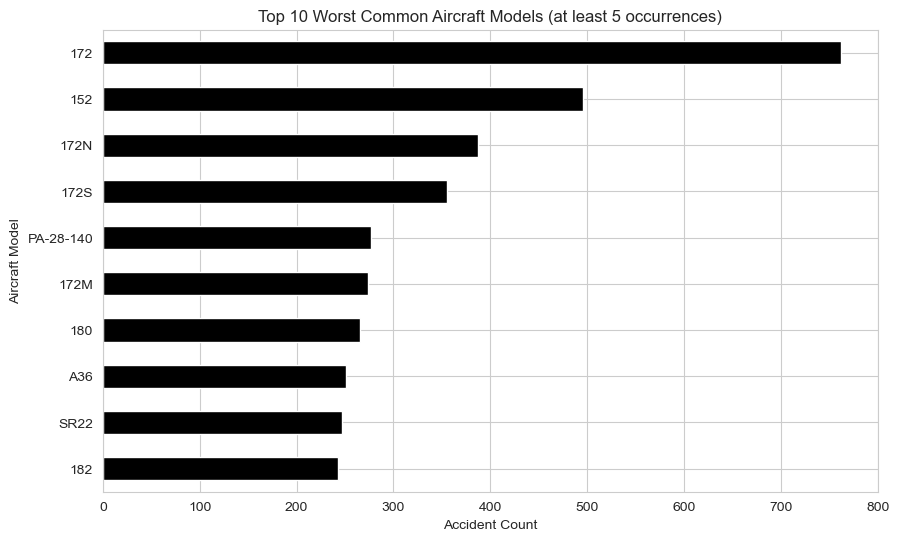

In [368]:
import matplotlib.pyplot as plt

# Count frequency of accidents per model
model_counts = modern_aircraft_data['Model'].value_counts()

# Select models with at least 5 occurrences
common_models = model_counts[model_counts >= 5]

# Filter the dataset to only include these common models
filtered_common_data = modern_aircraft_data[modern_aircraft_data['Model'].isin(common_models.index)]

# Identify the worst aircraft models (most accidents)
worst_common_models = filtered_common_data['Model'].value_counts().nlargest(10)

# Create a bar chart for the worst models
plt.figure(figsize=(10, 6))
worst_common_models.plot(kind='barh', color='black')
plt.xlabel('Accident Count')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Worst Common Aircraft Models (at least 5 occurrences)')
plt.gca().invert_yaxis()  # Ensures worst models appear at the top
plt.show()


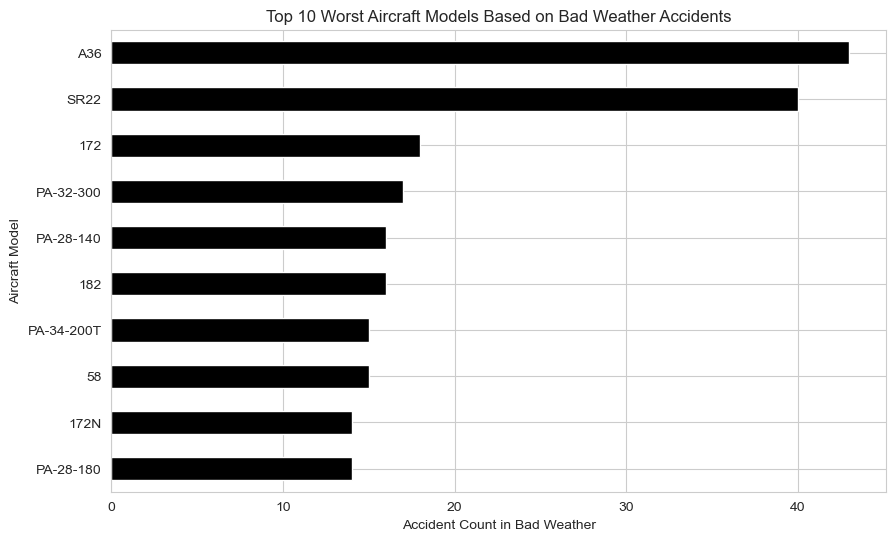

In [363]:
import matplotlib.pyplot as plt

# Filter accidents that occurred in IMC (bad weather) within modern aircraft data
bad_weather_accidents = modern_aircraft_data[modern_aircraft_data['Weather.Condition'] == 'IMC']

# Count the frequency (occurrence)
bad_weather_counts = bad_weather_accidents['Model'].value_counts()

# Identify the worst aircraft models (most accidents in bad weather)
worst_bad_weather_models = bad_weather_counts.nlargest(10)

# Create a bar chart for the worst models in bad weather
plt.figure(figsize=(10, 6))
worst_bad_weather_models.plot(kind='barh', color='black')
plt.xlabel('Accident Count in Bad Weather')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Worst Aircraft Models Based on Bad Weather Accidents')
plt.gca().invert_yaxis()  # Ensures worst models appear at the top
plt.show()


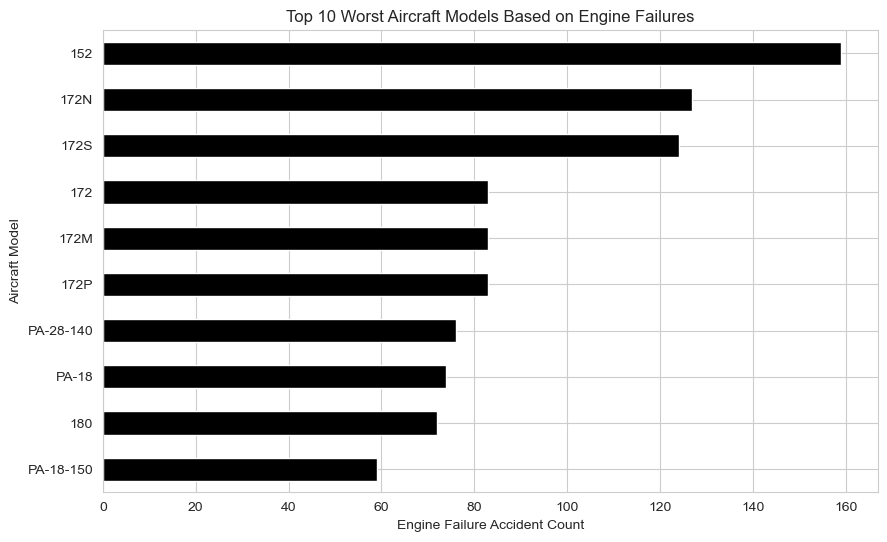

In [362]:
import matplotlib.pyplot as plt

# Count frequency of accidents per model
engine_failure_counts = engine_failure_data['Model'].value_counts()

# Identify worst aircraft (those with the most failures)
worst_engine_models = engine_failure_counts.nlargest(10)

# Create a bar chart for the worst models in engine failures
plt.figure(figsize=(10, 6))
worst_engine_models.plot(kind='barh', color='black')
plt.xlabel('Engine Failure Accident Count')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Worst Aircraft Models Based on Engine Failures')
plt.gca().invert_yaxis()  # Ensures the worst models appear at the top
plt.show()


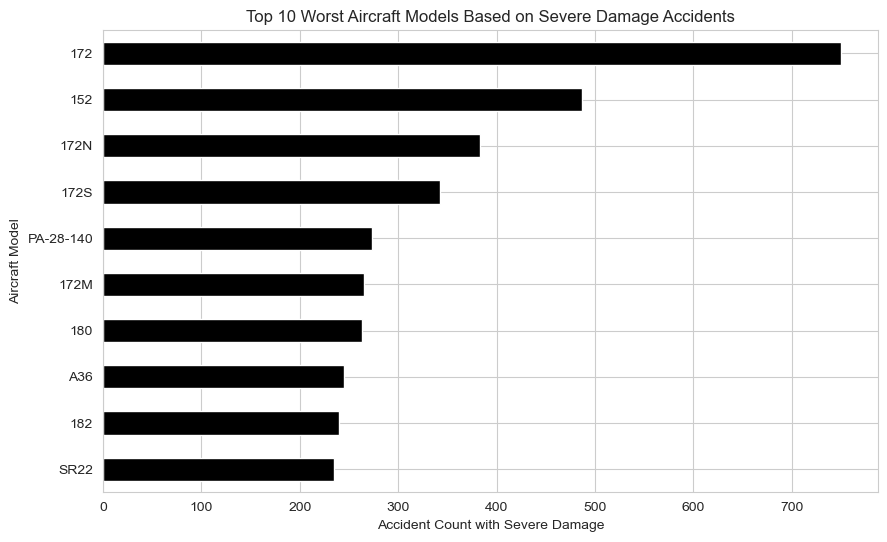

In [361]:
import matplotlib.pyplot as plt

# Filter accidents with severe damage (Destroyed or Substantial) within modern commercial & private flights
severe_damage_accidents = modern_aircraft_data[
    modern_aircraft_data['Aircraft.damage'].isin(['Destroyed', 'Substantial'])
]

# Count accidents per aircraft model
severe_damage_counts = severe_damage_accidents['Model'].value_counts()

# Identify the worst aircraft models (most accidents with severe damage)
worst_severe_damage_models = severe_damage_counts.nlargest(10)

# Create a bar chart for the worst models in severe damage accidents
plt.figure(figsize=(10, 6))
worst_severe_damage_models.plot(kind='barh', color='black')
plt.xlabel('Accident Count with Severe Damage')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Worst Aircraft Models Based on Severe Damage Accidents')
plt.gca().invert_yaxis()  
plt.show()


# SECTION FOUR:
## CONCLUSION.

Based on our objectives and findings, **the safest overall aircraft models**, determined by the occurrence of accidents, are as follows:
**AEROSTAR601, PA 11, PA44, CYGNET, SGS233, PA46 500TP, L-19E, DA 40 NG, STOL CH 750, AA 5B**       5

These models have the fewest accident occurrences, indicating they are among the **safest in terms of accident frequency**

If the company is looking for aircraft that can handle the **harshest weather conditions**, the following models would be the most suitable based on their ability to operate in IMC (bad weather) conditions, with the least number of accidents recorded:
**B24R, ESCAPADE, M-5-210C, MANTA 503, PA-42, TB20, VANS RV7A, NAVION A, 407, REMOS GX** GX     1
These models have demonstrated **strong performance** in challenging weather conditions, making them convenient choices for operations in such environments.

The following aircraft models have the **least occurrence of engine failures** during critical flight phases, such as takeoff, climb, and landing:
**Pitts S2B, BE-300, J35, PA-31T, XL2, Christen Eagle II, 206-L4, A2, DA 20-C1, SGS 1-26B**B           2
These models are among the safest in terms of engine failures during these key flight phases.

Since the company aims to **avoid severe damage** to aircraft after an accident, the following models have the least records of severe damage (either "Destroyed" or "Substantial") and would be suitable options:
**Star-Lite, Tailwheel, Aerostar 600, 5J, JUSTAIRCRAFT SUPERST, SUPER CHIEF, KOLB MARK 3X, EA 500, PITTS 12-EH, Zodiac CH-650**ac CH-650
These models have the fewest occurrences of severe damage, indicating that they are less likely to suffer significant damage in the event of an accident.

Aircraft models such as **A36, SR22, 172, 172N, 172S, 172M, 172P, PA-28-140, 180, and 182** should be approached with caution, as they have **consistently recorded the highest number of accidents** across various categories.


Hence, the three safest aircraft models that I would  recommend are:

1.  **AEROSTAR 601** – Among the models with the least accidents overall.
2. **PA 11** – Recorded very few accidents, showing strong safety performance.
3. **DA 40 NG** – Safe in multiple categories, including overall accident count and severe damage.
These models have consistently shown low accident rates, making them reliable choices for the company.